## Observations and Insights

1- Data shows that mice treated with the drug Capomulin show signs of tumor shrinkage
2- Among the 4 drugs I created box and whisker plots for, Capomulin and Ramicane have similar effects to eachother, while Naftisol and Ketapril seperately have similar effects to eachother.
3- In the cases of Naftisol and Ketapril, the largest spread quarter of the iqr is the section that represents the smallest tumors, meaning that a relative many uses of Naftisol and Ketapril dont work far past the drug's mean potential.  In the cases of Capomulin and Ramicane, the largest quarter of the IRQ is that representing the smallest tumors, meaning that in most cases, the drug sometimes has extrordinarily effective uses.

## Dependencies and starter code

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy as sp
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mousedata = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

In [21]:
mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#manipulate data
mean = mousedata['Tumor Volume (mm3)'].mean()
median = mousedata['Tumor Volume (mm3)'].median()
variance = mousedata['Tumor Volume (mm3)'].var()
std = mousedata['Tumor Volume (mm3)'].std()
sem = mousedata['Tumor Volume (mm3)'].sem()


#create df
df1 = {'tumor mean': [mean], 'tumor median': [median], 'tumor variance': [variance], 'tumor std': [std], 'tumor sem': [sem]}
df2 = pd.DataFrame(data=df1)

df2.head()


,tumor mean,tumor median,tumor variance,tumor std,tumor sem
0,50.448381,48.951474,79.116074,8.894722,0.204436


## Bar plots

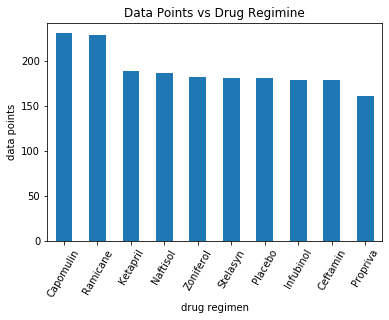

In [46]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#data manipulation
df3 = mousedata.copy()
data1 = df3["Drug Regimen"].value_counts()
#make and show plot
pandbar1 = data1.plot.bar(x= 'Drug Regimen', rot=60, title = 'Data Points vs Drug Regimine')
plt.xlabel('drug regimen')
plt.ylabel('data points')

pandbar1

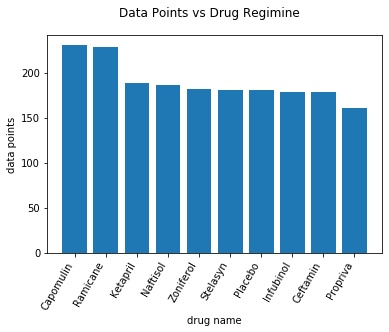

,drug name,counts
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182


In [43]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data1 = df3["Drug Regimen"].value_counts().rename_axis('drug name').reset_index(name='counts')
plt.bar(data1["drug name"], data1["counts"])
plt.suptitle('Data Points vs Drug Regimine')
plt.setp(plt.gca().get_xticklabels(), rotation=60, horizontalalignment='right')
plt.ylabel('data points')
plt.xlabel('drug name')
plt.show()
data1.head()

## Pie plots

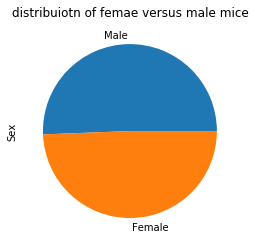

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data2 = df3["Sex"].value_counts()
pandpie1 = data2.plot.pie(title = 'distribuiotn of femae versus male mice')
pandpie1

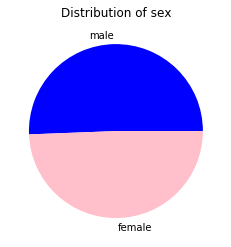

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'male', 'female'
colors = ["blue", "pink"]
plt.pie(data2, labels= labels, colors=colors)
plt.title("Distribution of sex")
plt.show()

## Quartiles, outliers and boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.



#data manipulation
datar = mousedata.copy()
datac = mousedata.copy()
datak = mousedata.copy()
datan = mousedata.copy()
data3 = mousedata.copy()

Ramicane = datar.loc[data3["Drug Regimen"] == "Ramicane"]
Capomulin = datac.loc[data3["Drug Regimen"] == "Capomulin"]
Ketapril = datak.loc[data3["Drug Regimen"] == "Ketapril"]
Naftisol = datan.loc[data3["Drug Regimen"] == "Naftisol"]

iqrc = sp.stats.iqr(Capomulin["Tumor Volume (mm3)"])
iqrr = sp.stats.iqr(Ramicane["Tumor Volume (mm3)"])
iqrk = sp.stats.iqr(Ketapril["Tumor Volume (mm3)"])
iqrn = sp.stats.iqr(Naftisol["Tumor Volume (mm3)"])

#create df
df5 = df4 = {'Drug Regmine': ['Ramicane', 'Capomulin', 'Ketapril', 'Naftisol'], 'iqr': [iqrc, iqrr, iqrk, iqrn]}
df5 = pd.DataFrame(data=df4)
df5.head()


,Drug Regmine,iqr
0,Ramicane,7.314067
1,Capomulin,8.325365
2,Ketapril,12.637964
3,Naftisol,12.677160


Text(0.5, 1.0, 'Ramicane box and whisker')

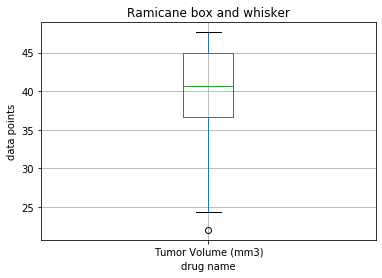

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


bpr = (Ramicane.boxplot(column=['Tumor Volume (mm3)']))
plt.ylabel('data points')
plt.xlabel('drug name')
plt.title("Ramicane box and whisker")


Text(0.5, 1.0, 'Capomulin box and whisker')

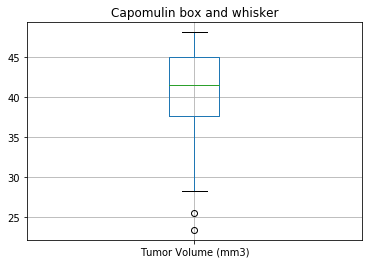

In [37]:
bpc = (Capomulin.boxplot(column=['Tumor Volume (mm3)']))
plt.title("Capomulin box and whisker")

Text(0.5, 1.0, 'ketapril box and whisker')

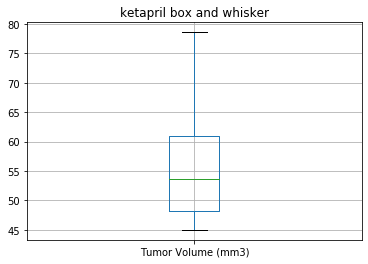

In [38]:
bpk = (Ketapril.boxplot(column=['Tumor Volume (mm3)']))
plt.title("ketapril box and whisker")

Text(0.5, 1.0, 'Naftisol box and whisker')

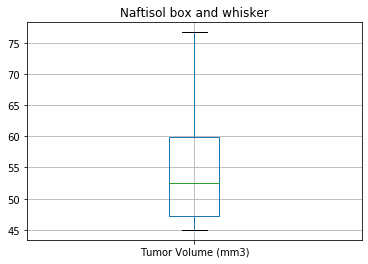

In [39]:
bpn = (Naftisol.boxplot(column=['Tumor Volume (mm3)']))
plt.title("Naftisol box and whisker")

## Line and scatter plots

Text(0, 0.5, 'tumor volume (mm3)')

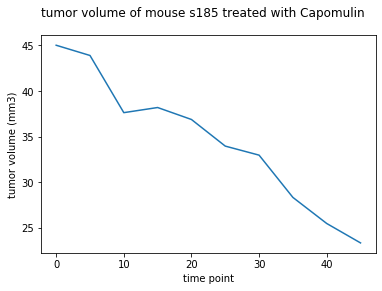

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data4 = mousedata.copy()
s185 = datan.loc[data3["Mouse ID"] == "s185"]

plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"])
plt.suptitle('tumor volume of mouse s185 treated with Capomulin')
plt.xlabel('time point')
plt.ylabel('tumor volume (mm3)')

Text(0, 0.5, 'tumor volume (mm3)')

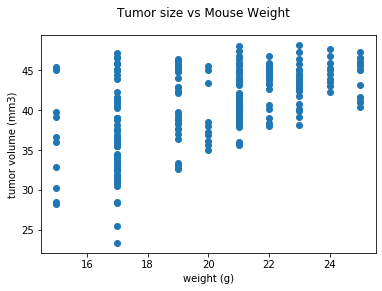

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(Capomulin["Weight (g)"], Capomulin['Tumor Volume (mm3)'])
plt.suptitle('Tumor size vs Mouse Weight')
plt.xlabel('weight (g)')
plt.ylabel('tumor volume (mm3)')


In [42]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#clean data
cap2 = Capomulin.drop(columns=["Timepoint", "Age_months", "Sex", "Drug Regimen", "Metastatic Sites", "Mouse ID"], axis =1)
#calculate
capcor = cap2.corr(method ='pearson') 
capcor
print("Coefficient table",capcor)

Coefficient table                     Weight (g)  Tumor Volume (mm3)
Weight (g)              1.0000              0.5257
Tumor Volume (mm3)      0.5257              1.0000
